In [161]:
import numpy as np
import pandas as pd
import pickle
import time
from geopy.distance import geodesic

## Creating the Cleaned Dataframe

In [65]:
with open('../data/yelp/rest_yelp_api_2020-07-24.pkl', 'rb') as f:
    data = pickle.load(f)

In [66]:
pd.DataFrame(data)

,identifier,name,postal_code,unit,house,street,yelp_call
0,George Simnos & Joakim Bostner & Stelio Loukak...,George Simnos & Joakim Bostner & Stelio Loukakos,V5V 4E9,None,4153,FRASER ST,"{'id': 'BmXmppx7LPtEBITArIPQRA', 'alias': 'bow..."
1,Sodexo @Vancouver Community College 1120 E 7TH...,Sodexo @Vancouver Community College,V5T 4V5,None,1120,E 7TH AV,None
2,Cilantro Cafe110 840 HOWE STV6Z 2L2,Cilantro Cafe,V6Z 2L2,110,840,HOWE ST,"{'id': 'H9xTl17WiyS57yxDVdxKkA', 'alias': 'cil..."
3,O-Bowl 3132 W BROADWAYV6K 2H3,O-Bowl,V6K 2H3,None,3132,W BROADWAY,"{'id': 'SgwIcOBw733SYai71LOUDw', 'alias': 'o-b..."
4,Swiss Chalet Rotisserie + Grill 3204 W BROADWA...,Swiss Chalet Rotisserie + Grill,V6K 2H4,None,3204,W BROADWAY,"{'id': 'r4BuAOfRI74lgvSKghUq3w', 'alias': 'swi..."
...,...,...,...,...,...,...,...
5735,Po Kong Vegetarian Restaurant Ltd 1334 KINGSWA...,Po Kong Vegetarian Restaurant Ltd,V5V 3E4,None,1334,KINGSWAY,"{'id': 'mfgRqzZPPthaSaGGfOf2bw', 'alias': 'po-..."
5736,Sushi Dining Yagoto 2180 W BROADWAYV6K 2C8,Sushi Dining Yagoto,V6K 2C8,None,2180,W BROADWAY,"{'id': 'HhJyqNI0VOge4euARmlN7A', 'alias': 'yag..."
5737,Taf's Cafe 829 Granville StV6Z 1K7,Taf's Cafe,V6Z 1K7,None,829,Granville St,"{'id': 'n-ogm0lCwPeWJ758QMhlNw', 'alias': 'taf..."
5738,Teppan KitchenFC26 555 W HASTINGS STV6B 4N4,Teppan Kitchen,V6B 4N4,FC26,555,W HASTINGS ST,"{'id': 'ibM9mR5BAJJxl3d2CgQf2w', 'alias': 'tep..."


In [1072]:
data_clean = dict(name = [],
                  name_yelp = [],
                  postal_code = [],
                  unit = [],
                  house = [],
                  street = [],
                  categories = [],
                  is_claimed = [],
                  is_closed = [],
                  rating = [],
                  review_count = [],
                  price = [])

In [1073]:
cols = ['name', 'postal_code', 'unit', 'house', 'street']
for col in cols:
    for entry in data[str(col)]:
        data_clean[str(col)].append(entry)

for call in data['yelp_call']:
    if call == None:
        data_clean['name_yelp'].append(None)
        data_clean['is_claimed'].append(None)
        data_clean['is_closed'].append(None)
        data_clean['categories'].append([])
        data_clean['rating'].append(None)
        data_clean['review_count'].append(None)
        data_clean['price'].append(None)
    else:
        if 'name' not in call:
            data_clean['name_yelp'].append(None)
        else:
            data_clean['name_yelp'].append(call['name'])
        
        if 'is_claimed' not in call:
            data_clean['is_claimed'].append(None)
        else:
            data_clean['is_claimed'].append(call['is_claimed'])    

        if 'is_closed' not in call:
            data_clean['is_closed'].append(None)
        else:
            data_clean['is_closed'].append(call['is_closed'])    
        
        if 'categories' not in call:
            data_clean['categories'].append([])
        else:
            data_clean['categories'].append(call['categories'])

        if 'rating' not in call:
            data_clean['rating'].append(None)
        else:
            data_clean['rating'].append(call['rating'])

        if 'review_count' not in call:
            data_clean['review_count'].append(None)
        else:
            data_clean['review_count'].append(call['review_count'])

        if 'price' not in call:
            data_clean['price'].append(None)
        else:
            data_clean['price'].append(call['price'])


path = '../data/yelp/'
filename = 'rest_cleaned' + time.strftime('_%Y-%m-%d') + '.pkl'
with open(path + filename, 'wb') as f:
    pickle.dump(data_clean, f, pickle.HIGHEST_PROTOCOL)
print('Data saved in {} as {}'.format(path, filename))

Data saved in ../data/yelp/ as rest_cleaned_2020-07-24.pkl


In [94]:
with open('../data/yelp/rest_cleaned_2020-07-24.pkl', 'rb') as f:
    data_clean = pickle.load(f)
data_clean = pd.DataFrame(data_clean)

Collecting the data is not 100% accurate so it may receive some incorrect businesses which should be removed.

In [95]:
categories = requests.get('https://www.yelp.com/developers/documentation/v3/all_category_list/categories.json').json()

In [96]:
yelp_rest_cats = []
for category in categories:
    cat = category['parents']
    if 'restaurants' in cat or 'food' in cat:
        yelp_rest_cats.append(category['alias'])

In [97]:
category_list = []
for categories in data_clean['categories']:
    for category in categories:
        category_list.append(category['title'])

In [98]:
print(f'There are %i restaurant related categories within Yelp' % len(yelp_rest_cats))
print(f'There are %i restaurant related categories within my dataset' % len(list(set(category_list))))

There are 260 restaurant related categories within Yelp
There are 338 restaurant related categories within my dataset


In [99]:
ind = []
for i in range(len(data_clean['categories'])):
    for category in data_clean['categories'][i]:
        if category['alias'] not in yelp_rest_cats:
            ind.append(i)

In [100]:
data_clean = data_clean.drop(ind)

In [101]:
data_clean = data_clean.dropna(how = 'all', subset = ['is_claimed', 'is_closed', 'rating', 'review_count', 'price'])

In [152]:
data_clean = data_clean.replace({'price':{'$':1,'$$':2,'$$$':3,'$$$$':4}})
data_clean['categories'] = data_clean['categories'].apply(lambda x: [x[i]['title'] for i in range(len(x))])

In [153]:
data_clean

,name,name_yelp,postal_code,unit,house,street,categories,is_claimed,is_closed,rating,review_count,price,city,cord,distance_from_bike,distance_from_meter,avg_meter_price,is_chain
0,George Simnos & Joakim Bostner & Stelio Loukakos,Bows & Arrows,V5V 4E9,None,4153,FRASER ST,"[Coffee & Tea, Breakfast & Brunch, Diners]",True,True,3.5,48.0,2.0,Vancouver,"[-123.09053802490234, 49.24801254272461]",484.269175,737.825730,3.5,False
1,Cilantro Cafe,Cilantro Cafe,V6Z 2L2,110,840,HOWE ST,"[Cafes, Breakfast & Brunch]",False,False,5.0,1.0,NaN,Vancouver,"[-123.12157440185547, 49.28116226196289]",139.567807,20.701937,5.0,False
2,O-Bowl,O-bowl By Rustic Kitchen,V6K 2H3,None,3132,W BROADWAY,[Asian Fusion],True,True,3.5,5.0,2.0,Vancouver,"[-123.1748275756836, 49.263919830322266]",67.984544,20.196599,2.0,False
3,Swiss Chalet Rotisserie + Grill,Swiss Chalet Rotisserie & Grill,V6K 2H4,None,3204,W BROADWAY,"[Comfort Food, American (Traditional)]",True,True,2.5,40.0,2.0,Vancouver,"[-123.17621612548828, 49.26395034790039]",125.781718,17.660166,2.0,False
4,Rouge Bistro Inc,Rouge Bistro,V5Y 1B1,None,91,W 2ND AV,[American (Traditional)],True,True,4.0,36.0,1.0,Vancouver,"[-123.10581970214844, 49.26955032348633]",89.999070,22.753522,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,Pizza Vancouver,Pizza Vancouver,V6B 3H6,None,547,SEYMOUR ST,[Pizza],True,False,3.5,21.0,NaN,Vancouver,"[-123.114990234375, 49.28362274169922]",75.864434,20.724564,3.5,False
4270,Sushi Dining Yagoto,Yagoto Sushi Dining,V6K 2C8,None,2180,W BROADWAY,"[Sushi Bars, Japanese, Seafood]",False,False,4.5,73.0,2.0,Vancouver,"[-123.15471649169922, 49.26354217529297]",84.288242,25.023234,2.0,False
4271,Taf's Cafe,Taf's Café,V6Z 1K7,None,829,Granville St,[Cafes],True,False,2.5,43.0,1.0,Vancouver,"[-123.1205825805664, 49.281288146972656]",173.622860,61.975855,5.0,False
4272,Teppan Kitchen,Teppan Kitchen,V6B 4N4,FC26,555,W HASTINGS ST,"[Japanese, Fast Food]",True,False,3.0,15.0,NaN,Vancouver,"[-123.11188507080078, 49.28468322753906]",49.502889,57.585653,4.5,False


## Visualizations

Text(0, 0.5, 'Count')

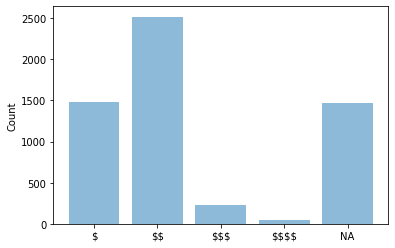

In [2024]:
objects = ("\$", "\$\$", "\$\$\$", "\$\$\$\$", "NA")
y_pos = np.arange(len(objects))

values = [np.sum((data_clean['price'] == "$").values),
          np.sum((data_clean['price'] == "$$").values),
          np.sum((data_clean['price'] == "$$$").values),
          np.sum((data_clean['price'] == "$$$$").values),
          np.sum((data_clean['price'].isna()).values)]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')



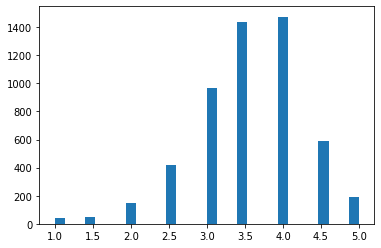

In [2032]:
x = data_clean['rating'].values
plt.hist(x, bins = 30);

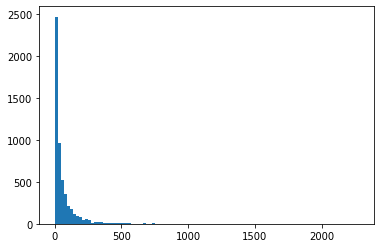

In [2035]:
x = data_clean['review_count'].values
plt.hist(x, bins = 100);

In [2043]:
np.nanmax(x)

2279.0

## Adding more features

In [103]:
# fine closest point for all restaurants to any part of the bikelane 
# need to iterate over all the points, find distance, and minimize 
# bikeways
# find closest point from restaurant to bike lane
# metric will be distance from bikelane

In [16]:
bikeways_df = pd.read_csv('../data/bikeways.csv', sep = ';')

In [107]:
def unlist(cords_list):
    return [cord for cords in cords_list for cord in cords]

In [108]:
bikeways_df = bikeways_df.rename(columns = {'Geom': 'geom'})['geom'].apply(lambda x: eval(x))\
                         .map(lambda x: unlist(x['coordinates']) if x['type'] == 'MultiLineString' else x['coordinates'])

In [109]:
bikeways_list = unlist(bikeways_df.tolist())

In [247]:
def get_dist(rest_cord, cord_list, price = False):
    distances = np.array([])
    for cord in cord_list:
        feature = cord
        rest = rest_cord
        distances = np.append(distances, geodesic(feature[::-1], rest[::-1]).m)
    if price == True:
        return parking_price[distances.argmin()]
    else:
        return distances.min()

In [104]:
# merge rest_distinct_df to data_clean to get long/lat
with open('../data/rest_distinct_df_2020-07-31.pkl', 'rb') as f:
    rest_distinct_df = pickle.load(f)
data_clean = pd.merge(data_clean, rest_distinct_df, on = ['name', 'postal_code', 'unit', 'house', 'street'], how = 'left').drop(columns = ['year', 'status'])
data_clean = data_clean.dropna(subset=['longitude'])

In [105]:
# create list for long/lat to get distance from bike
data_clean['cord'] = data_clean[['longitude', 'latitude']].values.tolist()
data_clean = data_clean.drop(columns = ['longitude', 'latitude'])

In [112]:
# find minimum distance of each restaurant to bike lane
data_clean['distance_from_bike'] = data_clean['cord'].apply(lambda x: get_dist(x, bikeways_list))

In [ ]:
# parking meters
# avg cost

In [216]:
parking_df = pd.read_csv('data/parking-meters.csv', sep = ';')

In [217]:
parking_cords = parking_df.rename(columns = {'Geom': 'geom'})['geom'].apply(lambda x: eval(x))\
                          .map(lambda x: x['coordinates'])

# gets rid of dollar sign and casts to float
parking_price = parking_df[['R_MF_9A_6P', 'R_MF_6P_10', 'R_SA_9A_6P', 'R_SA_6P_10', 'R_SU_9A_6P', 'R_SU_6P_10']].replace('\$', '', regex=True).astype(float)
columns = ['R_MF_9A_6P', 'R_MF_6P_10', 'R_SA_9A_6P', 'R_SA_6P_10', 'R_SU_9A_6P', 'R_SU_6P_10']

# get average price over all time periods
parking_price['avg_price'] = parking_price[columns].sum(axis=1) / len(columns)
parking_price = parking_price['avg_price']

data_clean['distance_from_meter'] = data_clean['cord'].apply(lambda x: get_dist(x, parking_cords))
data_clean['avg_meter_price'] = data_clean['cord'].apply(lambda x: get_dist(x, parking_cords, price = True))

In [271]:
# chain
# if the name appears more than once in the dataset
rest_freq = data_clean['name'].value_counts()
chain_list = rest_freq[rest_freq > 1].reset_index()['index'].tolist()
data_clean['is_chain'] = data_clean['name'].apply(lambda x: x in chain_list)

In [275]:
data_clean = data_clean.reset_index().drop(columns = 'index')

In [ ]:
# density
# iterate over all restaurants for each restaurant to find distance between

densities = []
for j in range(len(data_clean['cord'])):
    density = 0
    for i in range(len(data_clean.drop(j)['cord'])):
        dist = geodesic(data_clean.iloc[j]['cord'][::-1], data_clean.drop(j).iloc[i]['cord'][::-1]).m
        if dist < 500:
            density += 1
    densities.append(density)

In [277]:
data_clean['density'] = densities

In [278]:
data_clean

,name,name_yelp,postal_code,unit,house,street,categories,is_claimed,is_closed,rating,review_count,price,city,cord,distance_from_bike,distance_from_meter,avg_meter_price,is_chain,density
0,George Simnos & Joakim Bostner & Stelio Loukakos,Bows & Arrows,V5V 4E9,None,4153,FRASER ST,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",True,True,3.5,48.0,$$,Vancouver,"[-123.09053802490234, 49.24801254272461]",484.269175,737.825730,3.5,False,45
1,Cilantro Cafe,Cilantro Cafe,V6Z 2L2,110,840,HOWE ST,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",False,False,5.0,1.0,None,Vancouver,"[-123.12157440185547, 49.28116226196289]",139.567807,20.701937,5.0,False,335
2,O-Bowl,O-bowl By Rustic Kitchen,V6K 2H3,None,3132,W BROADWAY,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",True,True,3.5,5.0,$$,Vancouver,"[-123.1748275756836, 49.263919830322266]",67.984544,20.196599,2.0,False,84
3,Swiss Chalet Rotisserie + Grill,Swiss Chalet Rotisserie & Grill,V6K 2H4,None,3204,W BROADWAY,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...",True,True,2.5,40.0,$$,Vancouver,"[-123.17621612548828, 49.26395034790039]",125.781718,17.660166,2.0,False,79
4,Rouge Bistro Inc,Rouge Bistro,V5Y 1B1,None,91,W 2ND AV,"[{'alias': 'tradamerican', 'title': 'American ...",True,True,4.0,36.0,$,Vancouver,"[-123.10581970214844, 49.26955032348633]",89.999070,22.753522,1.0,False,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,Pizza Vancouver,Pizza Vancouver,V6B 3H6,None,547,SEYMOUR ST,"[{'alias': 'pizza', 'title': 'Pizza'}]",True,False,3.5,21.0,None,Vancouver,"[-123.114990234375, 49.28362274169922]",75.864434,20.724564,3.5,False,361
4168,Sushi Dining Yagoto,Yagoto Sushi Dining,V6K 2C8,None,2180,W BROADWAY,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",False,False,4.5,73.0,$$,Vancouver,"[-123.15471649169922, 49.26354217529297]",84.288242,25.023234,2.0,False,37
4169,Taf's Cafe,Taf's Café,V6Z 1K7,None,829,Granville St,"[{'alias': 'cafes', 'title': 'Cafes'}]",True,False,2.5,43.0,$,Vancouver,"[-123.1205825805664, 49.281288146972656]",173.622860,61.975855,5.0,False,351
4170,Teppan Kitchen,Teppan Kitchen,V6B 4N4,FC26,555,W HASTINGS ST,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",True,False,3.0,15.0,None,Vancouver,"[-123.11188507080078, 49.28468322753906]",49.502889,57.585653,4.5,False,289


In [279]:
path = '../data/'
filename = 'data_cleaned' + time.strftime('_%Y-%m-%d') + '.pkl'
with open(path + filename, 'wb') as f:
    pickle.dump(data_clean, f, pickle.HIGHEST_PROTOCOL)

In [268]:
with open('../data/data_cleaned_2020-07-26.pkl', 'rb') as f:
    data_clean = pickle.load(f)